In [92]:
# Import the required libraries and dependencies
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, balanced_accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import utils as u

In [93]:
# Read the data from the online_gaming_behavior_dataset.csv file into a Pandas DataFrame
orig_df = pd.read_csv("../Resources/online_gaming_behavior_dataset.csv")
# Review the DataFrame
orig_df

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40029,49029,32,Male,USA,Strategy,20.619662,0,Easy,4,75,85,14,Medium
40030,49030,44,Female,Other,Simulation,13.539280,0,Hard,19,114,71,27,High
40031,49031,15,Female,USA,RPG,0.240057,1,Easy,10,176,29,1,High
40032,49032,34,Male,USA,Sports,14.017818,1,Medium,3,128,70,10,Medium


In [94]:
orig_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usag

In [95]:
## No null values
orig_df.isnull().sum()

PlayerID                     0
Age                          0
Gender                       0
Location                     0
GameGenre                    0
PlayTimeHours                0
InGamePurchases              0
GameDifficulty               0
SessionsPerWeek              0
AvgSessionDurationMinutes    0
PlayerLevel                  0
AchievementsUnlocked         0
EngagementLevel              0
dtype: int64

In [96]:
gaming_df = u.preprocess_and_clean(orig_df)
gaming_df

,Age,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel,Gender_Female,Gender_Male,Location_Asia,Location_Europe,Location_Other,Location_USA,GameGenre_Action,GameGenre_RPG,GameGenre_Simulation,GameGenre_Sports,GameGenre_Strategy
0,43,0,1.0,6,108,79,25,1.0,0,1,0,0,1,0,0,0,0,0,1
1,29,0,1.0,5,144,11,10,1.0,1,0,0,0,0,1,0,0,0,0,1
2,22,0,0.0,16,142,35,41,2.0,1,0,0,0,0,1,0,0,0,1,0
3,35,1,0.0,9,85,57,47,1.0,0,1,0,0,0,1,1,0,0,0,0
4,33,0,1.0,2,131,95,37,1.0,0,1,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40029,32,0,0.0,4,75,85,14,1.0,0,1,0,0,0,1,0,0,0,0,1
40030,44,0,2.0,19,114,71,27,2.0,1,0,0,0,1,0,0,0,1,0,0
40031,15,1,0.0,10,176,29,1,2.0,1,0,0,0,0,1,0,1,0,0,0
40032,34,1,1.0,3,128,70,10,1.0,0,1,0,0,0,1,0,0,0,1,0


In [97]:
### Split the data applying the split_data function and running train_test_split from sklearn
X,y = u.split_data(gaming_df)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=7)


In [98]:
### Scale the data by running Standard Scaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[-0.69551503, -0.89464628,  0.436473  , ...,  1.9987519 ,
        -0.50369216, -0.49932339],
       [ 0.898093  , -0.89464628, -0.2562772 , ..., -0.50031222,
        -0.50369216, -0.49932339],
       [ 1.19689451,  0.38552122,  0.7828481 , ..., -0.50031222,
        -0.50369216, -0.49932339],
       ...,
       [ 1.19689451,  1.66568872,  0.0900979 , ..., -0.50031222,
        -0.50369216, -0.49932339],
       [-1.69152006, -0.89464628,  0.0900979 , ..., -0.50031222,
        -0.50369216, -0.49932339],
       [-0.39671353, -0.89464628, -1.46859005, ..., -0.50031222,
        -0.50369216, -0.49932339]])

In [99]:
# Transforming the test dataset based on the fit from the training dataset
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[-1.09391704,  0.38552122,  0.7828481 , ..., -0.50031222,
        -0.50369216,  2.00271011],
       [-0.49631403, -0.89464628, -1.46859005, ..., -0.50031222,
        -0.50369216,  2.00271011],
       [ 1.59529652,  0.38552122,  0.26328545, ..., -0.50031222,
        -0.50369216, -0.49932339],
       ...,
       [-0.49631403,  0.38552122,  1.30241075, ..., -0.50031222,
        -0.50369216,  2.00271011],
       [ 1.39609551,  1.66568872,  0.436473  , ...,  1.9987519 ,
        -0.50369216, -0.49932339],
       [ 0.898093  , -0.89464628, -0.2562772 , ..., -0.50031222,
        -0.50369216,  2.00271011]])

In [100]:
### START OF ML (Random Classifier model)
rf = u.create_and_fit_model(RandomForestClassifier,X_train_scaled,y_train, num=10)
u.eval_model(rf,X_test_scaled,y_test)

confusion matrix: [[7911  125]
 [1943   30]]
balanced accuracy score: 0.49982513433593434
classification report:               precision    recall  f1-score   support

           0       0.80      0.98      0.88      8036
           1       0.19      0.02      0.03      1973

    accuracy                           0.79     10009
   macro avg       0.50      0.50      0.46     10009
weighted avg       0.68      0.79      0.72     10009



In [101]:
# When Varying the number of estimators, the following results occurred.
# With 2 estimators, balance accuracy score is 49.8%
# With 10 estimators, balance accuracy score is 49.9%
# With 100 estimators, balanced accuracy score is 49.9%
# The above results are all at or near 50%, which is no better than the flip of a coin, or random guess.


In [102]:
# print the model score
print(f"Training Model Score: {rf.score(X_train_scaled, y_train)}")
print(f"Testing Model Score: {rf.score(X_test_scaled, y_test)}")

Training Model Score: 0.9734221482098252
Testing Model Score: 0.7933859526426217


In [103]:
# Get the feature importance array
# The frequency in which a feature is selected over the random forest is an indication of how important it is
feature_importances = rf.feature_importances_

In [104]:
# List the features by ranking of most important to least important
importances_sorted = sorted(zip(feature_importances, X.columns), reverse=True)
importances_sorted

[(0.18073104808706517, 'AvgSessionDurationMinutes'),
 (0.1725621730092993, 'PlayerLevel'),
 (0.16239435236881847, 'AchievementsUnlocked'),
 (0.14844824472492366, 'Age'),
 (0.12012006959497042, 'SessionsPerWeek'),
 (0.03826725654965655, 'GameDifficulty'),
 (0.03096612472734293, 'EngagementLevel'),
 (0.015584634543799884, 'GameGenre_Simulation'),
 (0.014813350850443488, 'Location_Europe'),
 (0.014282734141876757, 'GameGenre_Sports'),
 (0.013901822035414808, 'Location_USA'),
 (0.013831052947267154, 'GameGenre_RPG'),
 (0.013727878019804508, 'Location_Asia'),
 (0.01355907785782513, 'GameGenre_Action'),
 (0.012801720061981789, 'Gender_Female'),
 (0.012693056127083293, 'Gender_Male'),
 (0.012475883296133404, 'GameGenre_Strategy'),
 (0.00883952105629335, 'Location_Other')]

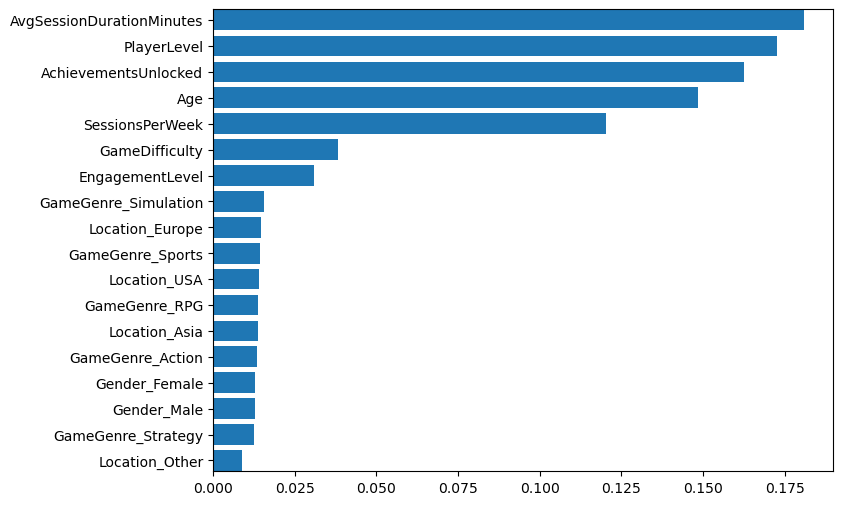

In [105]:
# Plot the feature importances
features = sorted(zip(X.columns, feature_importances), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(8,6)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [106]:
# Make predictions using the testing data
predictions = rf.predict(X_test_scaled)

In [107]:
# Calculate the accuracy score
# Note that running this function provides the same result as running the model scores above
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test, predictions)
acc_score

0.7933859526426217

## Perform Random Under Sampler and Random Oversampler functions to balance the data

In [108]:
# Check the balance of the labels variable (`y`) by using the `value_counts` function.
y.value_counts()

InGamePurchases
0    31993
1     8041
Name: count, dtype: int64

In [109]:
# Import RandomUnderSampler from imblearn
from imblearn.under_sampling import RandomUnderSampler

# Instantiate a RandomUnderSampler instance
rus = RandomUnderSampler(random_state=1)

In [110]:
# Fit the training data to the random undersampler model
X_undersampled, y_undersampled = rus.fit_resample(X_train_scaled, y_train)

In [111]:
# Count distinct values for the resampled target data
y_undersampled.value_counts()

InGamePurchases
0    6068
1    6068
Name: count, dtype: int64

###  Create and fit a `RandomForestClassifier` to the **undersampled** training data.

In [112]:
# Instantiate a new RandomForestClassier model
model_undersampled = RandomForestClassifier()

# Fit the undersampled data the new model
model_undersampled.fit(X_undersampled, y_undersampled)

RandomForestClassifier()

In [113]:
# Predict labels for oversampled testing features
y_pred_undersampled = model_undersampled.predict(X_test)

c:\Users\mnich\anaconda3\envs\dev\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [114]:
# Import Classification Report from sklearn
from sklearn.metrics import classification_report
# Print classification reports
print(f'balanced accuracy score: {balanced_accuracy_score(y_test,predictions)}')
print(f"Classification Report - Original Data")
print(classification_report(y_test, predictions))
print("---------")
print(f"Classification Report - Undersampled Data")
print(f'balanced accuracy score Undersampled Data: {balanced_accuracy_score(y_test,y_pred_undersampled)}')
print(classification_report(y_test, y_pred_undersampled))

balanced accuracy score: 0.49982513433593434
Classification Report - Original Data
              precision    recall  f1-score   support

           0       0.80      0.98      0.88      8036
           1       0.19      0.02      0.03      1973

    accuracy                           0.79     10009
   macro avg       0.50      0.50      0.46     10009
weighted avg       0.68      0.79      0.72     10009

---------
Classification Report - Undersampled Data
balanced accuracy score Undersampled Data: 0.5057189113762524
              precision    recall  f1-score   support

           0       0.81      0.64      0.72      8036
           1       0.20      0.37      0.26      1973

    accuracy                           0.59     10009
   macro avg       0.50      0.51      0.49     10009
weighted avg       0.69      0.59      0.63     10009



---

## Random Oversampler

In [115]:
# Import RandomOverSampler from imblearn
from imblearn.over_sampling import RandomOverSampler

# Instantiate a RandomOversampler instance
ros = RandomOverSampler(random_state=1)

In [116]:
# Fit the training data to the `RandomOverSampler` model
# SHOULD SCALED DATA BE USED HERE?
X_oversampled, y_oversampled = ros.fit_resample(X_train_scaled, y_train)

In [117]:
# Count distinct values
y_oversampled.value_counts()

InGamePurchases
1    23957
0    23957
Name: count, dtype: int64

###  Create and fit a `RandomForestClassifier` to the **oversampled** training data.

In [118]:
# Instantiate a new RandomForestClassier model
model_oversampled = RandomForestClassifier()

# Fit the oversampled data the new model
model_oversampled.fit(X_oversampled, y_oversampled)

RandomForestClassifier()

In [119]:
# Predict labels for oversampled testing features
# SHOULD SCALED DATA BE USED HERE???
y_pred_oversampled = model_oversampled.predict(X_test_scaled)

In [122]:
# Print classification reports
print(f"Classification Report - Original Data")
print(f'balanced accuracy score - Original Data: {balanced_accuracy_score(y_test,predictions)}')
print(classification_report(y_test, predictions))
print("---------")
print(f"Classification Report - Undersampled Data")
print(f'balanced accuracy score - Undersampled Data: {balanced_accuracy_score(y_test,y_pred_undersampled)}')
print(classification_report(y_test, y_pred_undersampled))
print("---------")
print(f"Classification Report - Oversampled Data")
print(f'balanced accuracy score - Oversampled Data: {balanced_accuracy_score(y_test,y_pred_oversampled)}')
print(classification_report(y_test, y_pred_oversampled))

Classification Report - Original Data
balanced accuracy score - Original Data: 0.49982513433593434
              precision    recall  f1-score   support

           0       0.80      0.98      0.88      8036
           1       0.19      0.02      0.03      1973

    accuracy                           0.79     10009
   macro avg       0.50      0.50      0.46     10009
weighted avg       0.68      0.79      0.72     10009

---------
Classification Report - Undersampled Data
balanced accuracy score - Undersampled Data: 0.5057189113762524
              precision    recall  f1-score   support

           0       0.81      0.64      0.72      8036
           1       0.20      0.37      0.26      1973

    accuracy                           0.59     10009
   macro avg       0.50      0.51      0.49     10009
weighted avg       0.69      0.59      0.63     10009

---------
Classification Report - Oversampled Data
balanced accuracy score - Oversampled Data: 0.4990875765088526
              pre